
////////////////////
Weekly Cashflow Sum (12-month)
////////////////////
Date
2024-07-07    2605.67
2024-07-14    -130.10
2024-07-21     630.12
2024-07-28     609.51
2024-08-04    -772.04
2024-08-11    -974.34
2024-08-18    2312.53
2024-08-25    -303.57
2024-09-01    1643.16
2024-09-08   -4365.68
2024-09-15    1226.84
2024-09-22   -1685.60
2024-09-29    1570.81
2024-10-06   -1903.31
2024-10-13    2161.30
2024-10-20   -1031.87
2024-10-27    1495.18
2024-11-03   -2585.70
2024-11-10    1459.93
2024-11-17     -14.72
2024-11-24    1816.24
2024-12-01   -1223.84
2024-12-08     156.28
2024-12-15   -1351.38
2024-12-22    2398.96
2024-12-29   -1095.12
2025-01-05     -30.79
2025-01-12    -900.79
2025-01-19     886.18
2025-01-26   -1475.89
2025-02-02    3600.67
2025-02-09   -3902.65
2025-02-16    3412.00
2025-02-23   -1484.81
2025-03-02     893.35
2025-03-09   -2521.86
2025-03-16    1922.70
2025-03-23   -1194.07
2025-03-30    3416.00
2025-04-06   -2192.97
2025-04-13    1849.36
2025-04-20    -748.

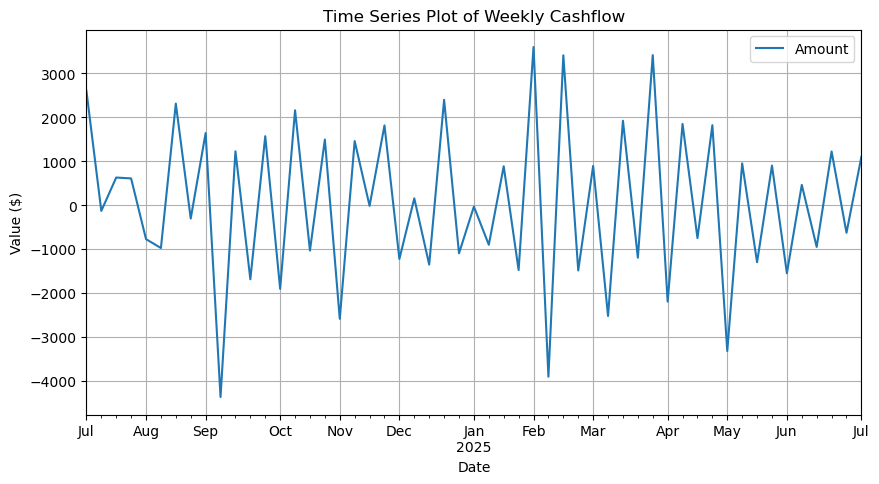

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from utils import get_stmt_data

df = get_stmt_data('../data/stmt.csv')

# Set date as index (convert to Timeseries )
df.set_index('Date', inplace=True)

weekly_cashflow = df['Amount'].resample('W').sum()
print('\n////////////////////\nWeekly Cashflow Sum (12-month)\n////////////////////')
print(weekly_cashflow)

# Plot weekly cashflow
import matplotlib.pyplot as plt

weekly_cashflow.plot(figsize=(10,5))
plt.title('Time Series Plot of Weekly Cashflow')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.grid(True)
plt.legend()
plt.show()


c:\Users\KylePC\anaconda3\envs\DataAnalysis_Statistics\Lib\site-packages\scipy\stats\_continuous_distns.py:6912: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


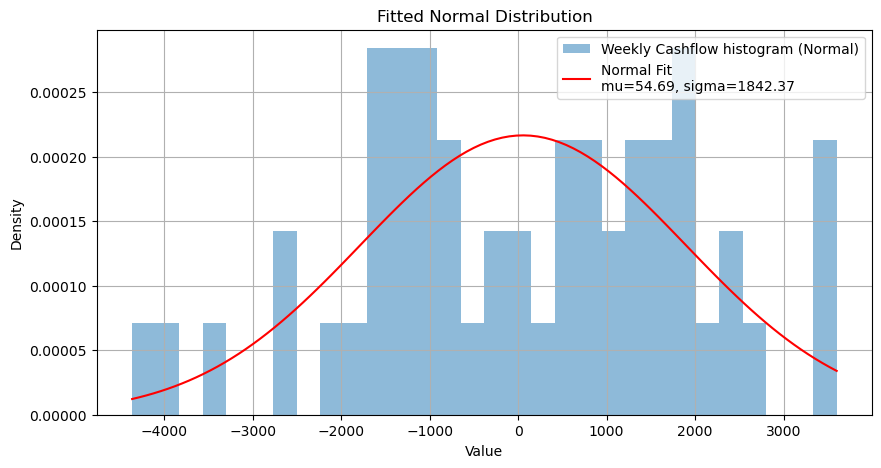

In [24]:
# Fit Distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit a normal dist.
mu, std = stats.norm.fit(weekly_cashflow)

# Fit gamma
params_gamma = stats.gamma.fit(weekly_cashflow)

# Fit lognormal
params_lognorm = stats.lognorm.fit(weekly_cashflow)

# Fit exponetial
params_exp = stats.expon.fit(weekly_cashflow)

x = np.linspace(min(weekly_cashflow), max(weekly_cashflow), 100)
pdf = stats.norm.pdf(x, mu, std)

plt.figure(figsize=(10,5))
plt.hist(weekly_cashflow, bins=30, density=True, alpha=0.5, label='Weekly Cashflow histogram (Normal)')
plt.plot(x, pdf, 'r-', label=f'Normal Fit\nmu={mu:.2f}, sigma={std:.2f}')
plt.title('Fitted Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()